In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'C:/Users/Harthik/Documents/VsCodeFile/Black_pepper_prediction/Dataset/Train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(500, 500),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 663 files belonging to 3 classes.


In [3]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'C:/Users/Harthik/Documents/VsCodeFile/Black_pepper_prediction/Dataset/Valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(500, 500),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 82 files belonging to 3 classes.


In [4]:
cnn = tf.keras.models.Sequential()

In [5]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[500,500,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

C:\Users\Harthik\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [7]:
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [8]:
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [9]:
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [10]:
cnn.add(tf.keras.layers.Dropout(0.25))

In [11]:
cnn.add(tf.keras.layers.Flatten())

In [12]:
cnn.add(tf.keras.layers.Dense(1500, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)))

In [13]:
cnn.add(tf.keras.layers.Dropout(0.4))

In [14]:
cnn.add(tf.keras.layers.Dense(units=3,activation='softmax'))

In [15]:
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-4,
    decay_steps=100000,
    decay_rate=0.96,
    staircase=True
)

In [16]:
cnn.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr_schedule),
            loss='categorical_crossentropy',
            metrics=['accuracy'])

In [17]:
cnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 500, 500, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 498, 498, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 249, 249, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 249, 249, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 247, 247, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 123, 123, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 123, 123, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 121, 121, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 60, 60, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 60, 60, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 58, 58, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 29, 29, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 29, 29, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 27, 27, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 13, 13, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 13, 13, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 86528)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1500)                │     129,793,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 1500)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 3)                   │           4,503 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 134,510,227 (513.12 MB)

 Trainable params: 134,510,227 (513.12 MB)

 Non-trainable params: 0 (0.00 B)

In [19]:
training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 178s 8s/step - accuracy: 0.3445 - loss: 11.2207 - val_accuracy: 0.5488 - val_loss: 3.2138
Epoch 2/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 166s 8s/step - accuracy: 0.6828 - loss: 3.0026 - val_accuracy: 0.8171 - val_loss: 2.5142
Epoch 3/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 163s 8s/step - accuracy: 0.8682 - loss: 2.3594 - val_accuracy: 0.7439 - val_loss: 2.3769
Epoch 4/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 161s 8s/step - accuracy: 0.8742 - loss: 2.1810 - val_accuracy: 0.8537 - val_loss: 2.3127
Epoch 5/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 169s 8s/step - accuracy: 0.9078 - loss: 2.0117 - val_accuracy: 0.9634 - val_loss: 1.9418
Epoch 6/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 162s 8s/step - accuracy: 0.9018 - loss: 1.9456 - val_accuracy: 0.8902 - val_loss: 1.9729
Epoch 7/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 161s 8s/step - accuracy: 0.9583 - loss: 1.7483 - val_accuracy: 0.9146 - val_loss: 1.9064
Epoch 8/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 163s 8s/step - accuracy: 0.9699 - loss: 1.6857 - val_accuracy: 0.8537 - 

In [20]:
train_loss, train_acc = cnn.evaluate(training_set)
print('Training accuracy:', train_acc)

21/21 ━━━━━━━━━━━━━━━━━━━━ 31s 1s/step - accuracy: 0.9977 - loss: 1.5014
Training accuracy: 0.9984917044639587


In [21]:
val_loss, val_acc = cnn.evaluate(validation_set)
print('Validation accuracy:', val_acc)

3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 0.8292 - loss: 2.2174
Validation accuracy: 0.8536585569381714


In [22]:
cnn.save('C:/Users/Harthik/Documents/VsCodeFile/Black_pepper_prediction/Saved_models/trained_plant_disease_model.keras')

In [23]:
training_history.history

{'accuracy': [0.4072398245334625,
  0.7375565767288208,
  0.8627451062202454,
  0.9064856767654419,
  0.9155354499816895,
  0.9155354499816895,
  0.9743589758872986,
  0.959276020526886,
  0.9713423848152161,
  0.993966817855835],
 'loss': [7.057196617126465,
  2.834578037261963,
  2.336080312728882,
  2.0970475673675537,
  1.9807966947555542,
  1.8964991569519043,
  1.7207504510879517,
  1.7000492811203003,
  1.6182708740234375,
  1.5395575761795044],
 'val_accuracy': [0.5487805008888245,
  0.8170731663703918,
  0.7439024448394775,
  0.8536585569381714,
  0.9634146094322205,
  0.8902438879013062,
  0.9146341681480408,
  0.8536585569381714,
  0.8170731663703918,
  0.8536585569381714],
 'val_loss': [3.213819980621338,
  2.5141706466674805,
  2.376851797103882,
  2.3127248287200928,
  1.941763162612915,
  1.9729459285736084,
  1.9064297676086426,
  1.982616901397705,
  1.977644443511963,
  2.076225996017456]}

In [24]:
print(training_history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


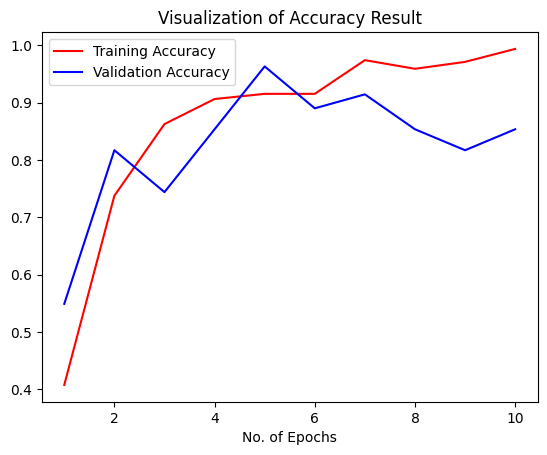

In [25]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()

In [26]:
class_name = validation_set.class_names

In [29]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'C:/Users/Harthik/Documents/VsCodeFile/Black_pepper_prediction/Dataset/Test',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=1,
    image_size=(500, 500),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 81 files belonging to 3 classes.


In [30]:
y_pred = cnn.predict(test_set)
predicted_categories = tf.argmax(y_pred, axis=1)

81/81 ━━━━━━━━━━━━━━━━━━━━ 8s 91ms/step


In [31]:
true_categories = tf.concat([y for x, y in test_set], axis=0)
Y_true = tf.argmax(true_categories, axis=1)

In [32]:
Y_true

<tf.Tensor: shape=(81,), dtype=int64, numpy=
array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)>

In [33]:
predicted_categories

<tf.Tensor: shape=(81,), dtype=int64, numpy=
array([0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 2, 1, 2, 2, 2, 2, 1, 1, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)>

In [34]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(Y_true,predicted_categories)

In [35]:
print(classification_report(Y_true,predicted_categories,target_names=class_name))

              precision    recall  f1-score   support

     Healthy       0.93      0.97      0.95        29
  Quick_wilt       1.00      0.73      0.84        26
   Slow_wilt       0.75      0.92      0.83        26

    accuracy                           0.88        81
   macro avg       0.89      0.87      0.87        81
weighted avg       0.90      0.88      0.88        81



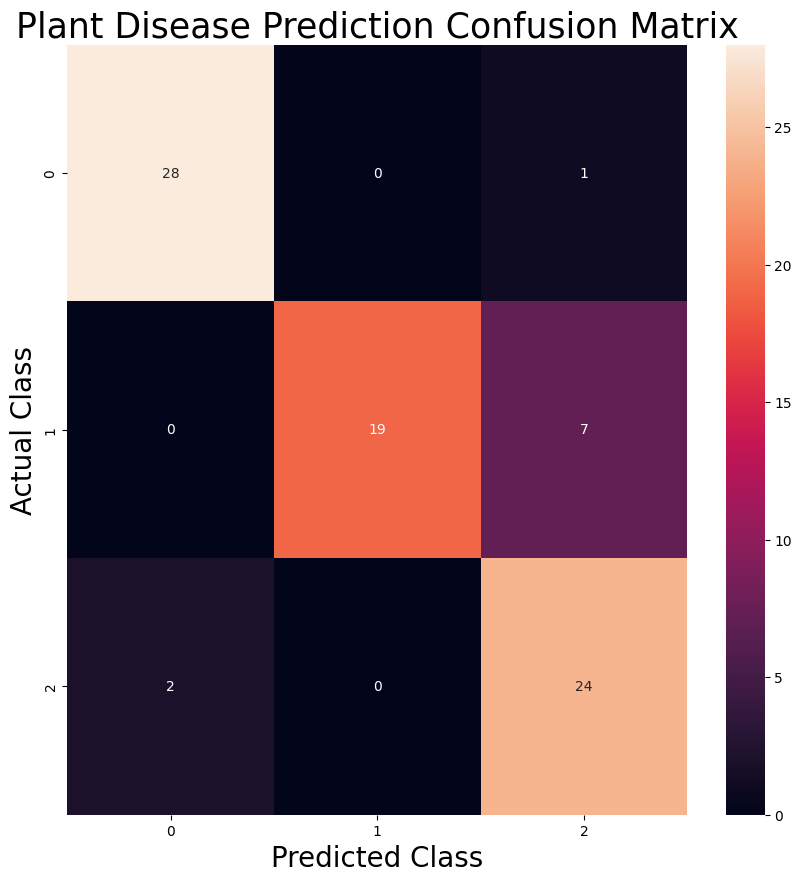

In [39]:
plt.figure(figsize=(10, 10))
sns.heatmap(cm,annot=True,annot_kws={"size": 10})

plt.xlabel('Predicted Class',fontsize = 20)
plt.ylabel('Actual Class',fontsize = 20)
plt.title('Plant Disease Prediction Confusion Matrix',fontsize = 25)
plt.show()

In [4]:
class_name = validation_set.class_names
print(class_name)

['Healthy', 'Quick_wilt', 'Slow_wilt']


In [5]:
cnn = tf.keras.models.load_model('C:/Users/Harthik/Documents/VsCodeFile/Black_pepper_prediction/Saved_models/trained_plant_disease_model.keras')

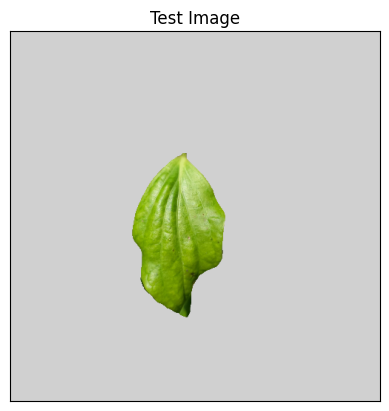

In [7]:
import cv2
image_path = 'C:/Users/Harthik/Documents/VsCodeFile/Black_pepper_prediction/Dataset/Test/Slow_wilt/PYMV272.jpg'
img = cv2.imread(image_path)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.title('Test Image')
plt.xticks([])
plt.yticks([])
plt.show()

In [8]:
image = tf.keras.preprocessing.image.load_img(image_path,target_size=(500,500))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])
predictions = cnn.predict(input_arr)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


In [9]:
print(predictions)

[[7.57718738e-03 1.13159416e-07 9.92422760e-01]]


In [10]:
result_index = np.argmax(predictions)
print(result_index)

2


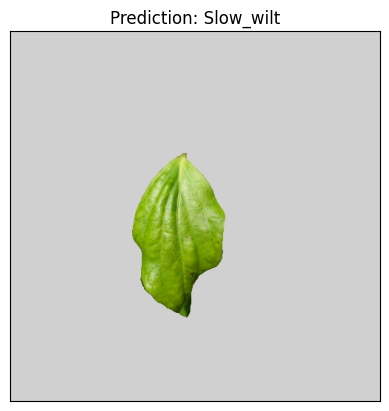

In [11]:
model_prediction = class_name[result_index]
plt.imshow(img)
plt.title(f"Prediction: {model_prediction}")
plt.xticks([])
plt.yticks([])
plt.show()